![title](presentation_images/logo_dauphine.png)

# Adversarial Attack Project

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Some-function-imports" data-toc-modified-id="Some-function-imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Some function imports</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Show-some-data" data-toc-modified-id="Show-some-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Show some data</a></span></li><li><span><a href="#Show-results-of-our-simple-CNN-on-those-data-(CIFAR10)" data-toc-modified-id="Show-results-of-our-simple-CNN-on-those-data-(CIFAR10)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Show results of our simple CNN on those data (CIFAR10)</a></span><ul class="toc-item"><li><span><a href="#Our-model" data-toc-modified-id="Our-model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Our model</a></span></li><li><span><a href="#Effectivness-of-our-model-on-CIFAR10" data-toc-modified-id="Effectivness-of-our-model-on-CIFAR10-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Effectivness of our model on CIFAR10</a></span></li></ul></li><li><span><a href="#Show-the-effect-of-an-attack-on-the-model-accuracy" data-toc-modified-id="Show-the-effect-of-an-attack-on-the-model-accuracy-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Show the effect of an attack on the model accuracy</a></span><ul class="toc-item"><li><span><a href="#Let's-take-one-random-image" data-toc-modified-id="Let's-take-one-random-image-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Let's take one random image</a></span></li><li><span><a href="#How-to-noise-this-image-in-order-to-fool-the-model-?" data-toc-modified-id="How-to-noise-this-image-in-order-to-fool-the-model-?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>How to noise this image in order to fool the model ?</a></span><ul class="toc-item"><li><span><a href="#Show-the-ideal-noise-to-add-to-this-image-to-fool-the-model" data-toc-modified-id="Show-the-ideal-noise-to-add-to-this-image-to-fool-the-model-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Show the ideal noise to add to this image to fool the model</a></span></li><li><span><a href="#But-to-make-the-attack-interesting,-the-image-has-to-stay-unchanged-for-human-eye" data-toc-modified-id="But-to-make-the-attack-interesting,-the-image-has-to-stay-unchanged-for-human-eye-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>But to make the attack interesting, the image has to stay unchanged for human eye</a></span></li></ul></li><li><span><a href="#Effectiveness-of-our-model-on-attacked-data-with-PGD-with-$\epsilon-=-0.03$-and-nb_iter-=-$3$" data-toc-modified-id="Effectiveness-of-our-model-on-attacked-data-with-PGD-with-$\epsilon-=-0.03$-and-nb_iter-=-$3$-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Effectiveness of our model on attacked data with PGD with $\epsilon = 0.03$ and nb_iter = $3$</a></span><ul class="toc-item"><li><span><a href="#Load-attacked-data" data-toc-modified-id="Load-attacked-data-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Load attacked data</a></span></li></ul></li></ul></li></ul></div>

## Some function imports

In [10]:
import os
import sys
import random 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
cwd = os.path.join(os.getcwd())
sys.path.append(cwd)

# Custom functions
import constants as cst
import import_data
import models
import attack_function
import visualization

## Import data

In [2]:
x_train, y_train, x_test, y_test = import_data.format_data()

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Show some data

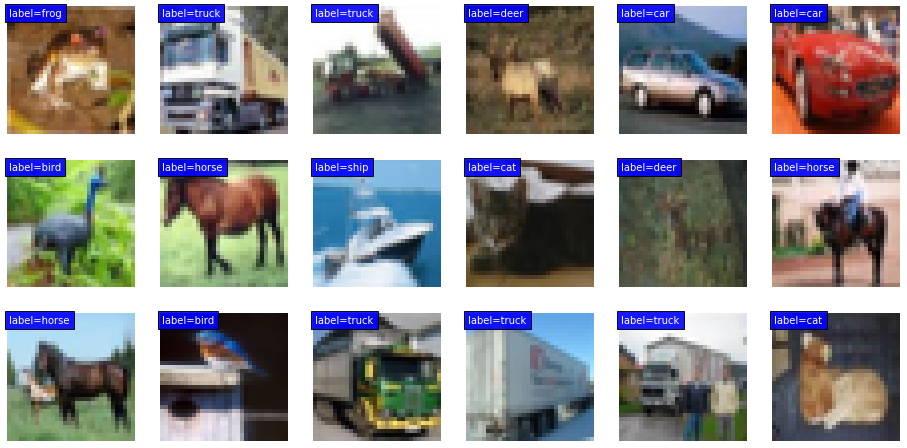

In [3]:
visualization.show_data(x_train, y_train)

## Show results of our simple CNN on those data (CIFAR10)

### Our model

In [4]:
model = load_model(cst.STANDARD_trained_model)

![title](presentation_images/standard_model_arch.png)

### Effectivness of our model on CIFAR10

78.56% of accuracy


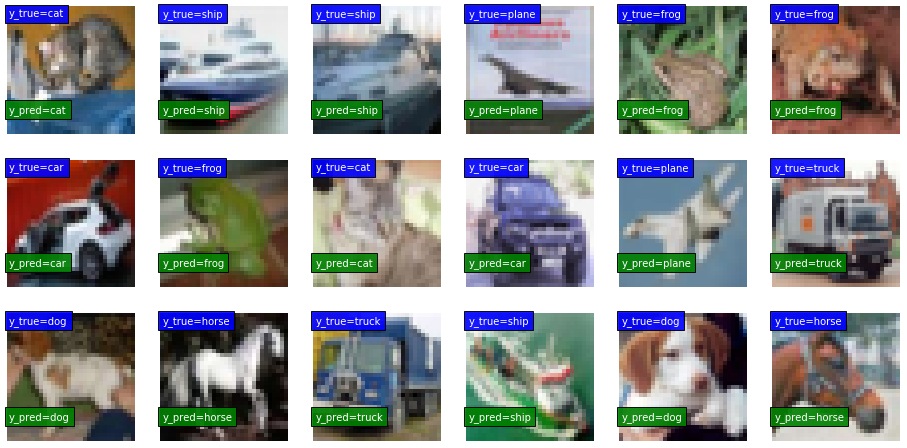

'78.56%'

In [5]:
visualization.show_dataset_and_predictions(x_test, y_test, model)

## Show the effect of an attack on the model accuracy

### Let's take one random image

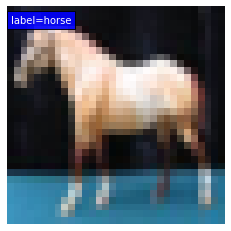

In [6]:
r1 = random.randint(0, 50000)
visualization.show_one_image(x_train, y_train, r1)

### How to noise this image in order to fool the model ?

#### Show the ideal noise to add to this image to fool the model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


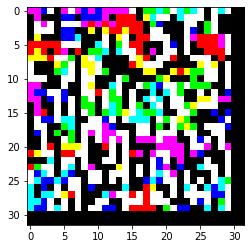

In [7]:
visualization.show_noise(x_train[r1], y_train[r1], model)

#### But to make the attack interesting, the image has to stay unchanged for human eye

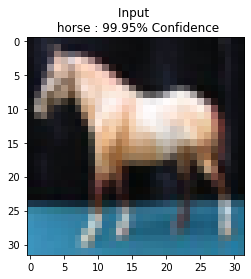

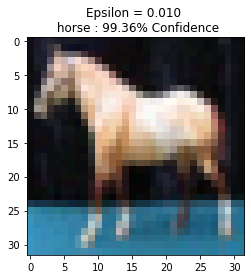

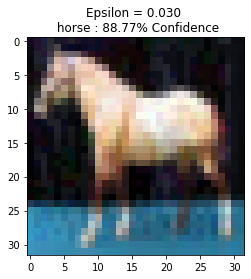

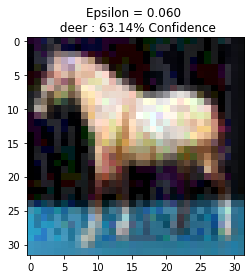

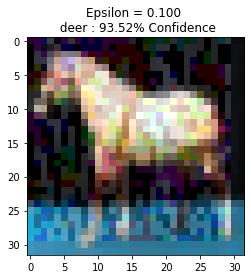

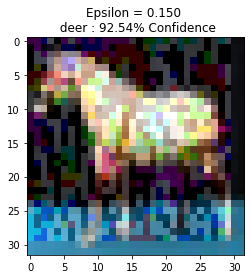

In [8]:
perturbations = visualization.create_adversarial_pattern(x_train[r1], y_train[r1], model)
visualization.show_attack_effect(x_train[r1], y_train[r1], perturbations, model)

### Effectiveness of our model on attacked data with PGD with $\epsilon = 0.03$ and nb_iter = $3$

#### Load attacked data

In [11]:
x_test_attacked = np.load(cst.ATTACKED_TEST)

9.87% of accuracy


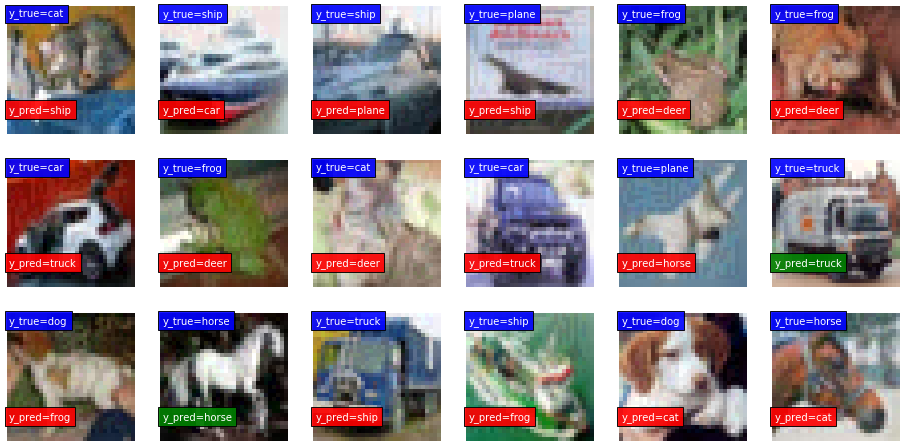

'9.87%'

In [12]:
visualization.show_dataset_and_predictions(x_test_attacked, y_test, model)